In [283]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
# srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding
from analysis_SIM_generate_fun import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SIM - Multipath

In [ ]:
%autoreload 2

def SIM_multi_path():
#     ############## finding range
#     # info: beta Longitudinal narrowing
#     # info: gamma Horizontally flatten
#     # alpha: size

    ############## generating multi_path_sim
    def gen_multi_path_sim(path2_sample,ratio):
        genn_amt=1000
        
        alpha1=5#3#4
        beta1=1
        gamma1=5 #4
        alpha2=1#1.5#1
        beta2=0.5#1#1
        gamma2=0.25
        
        para_adj_lower=0.8
        para_adj_higher=1.2
        beta_adj_lower=0.8#0.8
        beta_adj_higher=1.2#1.2
        
        alpha1_list= np.random.uniform(low=alpha1*para_adj_lower, high=alpha1*beta_adj_higher, size=(genn_amt,)) #upper side
        # beta1_list=[beta1]*genn_amt# np.random.uniform(low=0.15, high=0.35, size=(genn_amt,)) #upper side
        beta1_list=np.random.uniform(low=beta1*beta_adj_lower, high=beta1*beta_adj_higher, size=(genn_amt,)) #upper side
        gamma1_list=np.random.uniform(low=gamma1*para_adj_lower, high=gamma1*beta_adj_higher, size=(genn_amt,)) #
        alpha2_list=np.random.uniform(low=alpha2*para_adj_lower, high=alpha2*beta_adj_higher, size=(genn_amt,)) #downside
        # beta2_list=[beta2]*genn_amt# np.random.uniform(low=0.9, high=1.1, size=(genn_amt,)) #downside
        beta2_list=np.random.uniform(low=beta2*beta_adj_lower, high=beta2*beta_adj_higher, size=(genn_amt,)) #downside
        gamma2_list=np.random.uniform(low=gamma2*para_adj_lower, high=gamma2*beta_adj_higher, size=(genn_amt,)) #downside
        path1_pct=90#99
        path2_pct=99
        i=0
        data_df=pd.DataFrame()
        for alpha1,alpha2,beta1,beta2,gamma1,gamma2 in zip(alpha1_list,alpha2_list,beta1_list,beta2_list,gamma1_list,gamma2_list):
            
            data = generate_multipath(gene_num=1, 
                                      alpha1=alpha1, 
                                      alpha2=alpha2, 
                                      beta1=beta1, 
                                      beta2=beta2, 
                                      gamma1=gamma1, 
                                      gamma2=gamma2, 
                                      path1_pct=path1_pct, 
                                      path2_pct=path2_pct, 
                                      path1_sample=int(path2_sample/ratio), 
                                      path2_sample=path2_sample, 
                                      noise_level=0.2)


            # data = generate_multipath(gene_num=1, alpha1=alpha1, alpha2=alpha2, beta1=beta1, beta2=beta2, gamma1=gamma1, gamma2=gamma2, path1_pct=path1_pct, path2_pct=path2_pct, path1_sample=path1_sample, path2_sample=int(path1_sample/ratio), noise_level=0.2)
            data.loc[:,'gene_name'] = 'simulation'+str(i)
            #data_df=data_df.append(data)
            i=i+1
            if i % 10 == 0:print(i)
                
            dir_name='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/raw/multi_path_Path2Down_'+str(path2_sample)+'__R'+str(ratio)+'.csv'
            
            if i==1:
                data.to_csv(dir_name,index=False)
            else:
                data.to_csv(dir_name,index=False,mode='a',header=False)
    
    # ratio_list=[0.4]
    ratio_list=[0.4,0.6,0.8,1]

    path2_sample=1000 #upper
    for ratio in ratio_list:
        print(ratio)
        gen_multi_path_sim(path2_sample,ratio)

SIM_multi_path()

0.4
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


# preview

['simulation0', 'simulation1', 'simulation2', 'simulation3', 'simulation4', 'simulation5', 'simulation6', 'simulation7', 'simulation8', 'simulation9', 'simulation10', 'simulation11', 'simulation12', 'simulation13', 'simulation14', 'simulation15', 'simulation16', 'simulation17', 'simulation18', 'simulation19']


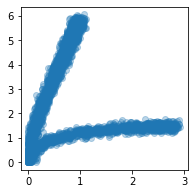

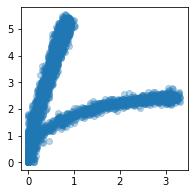

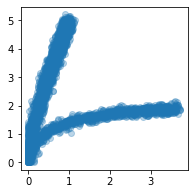

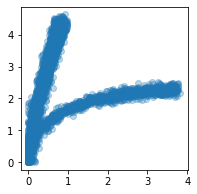

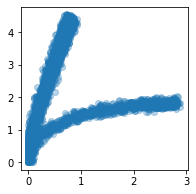

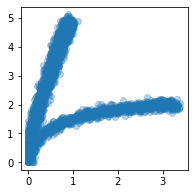

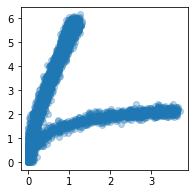

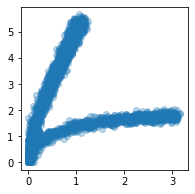

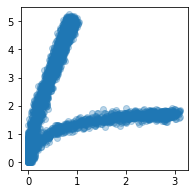

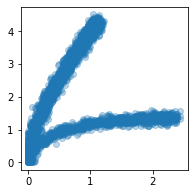

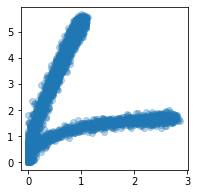

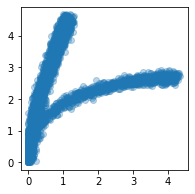

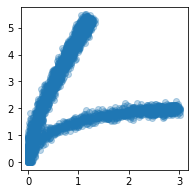

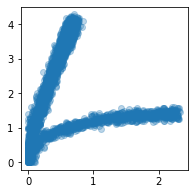

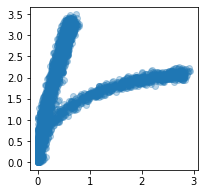

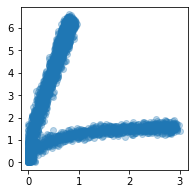

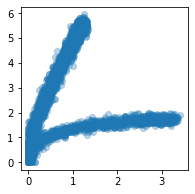

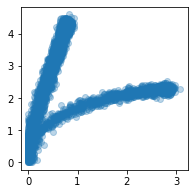

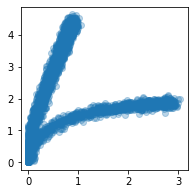

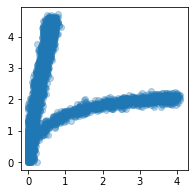

In [347]:
df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/raw/multi_path_Path2Down_1000__R0.4.csv')
gene_list=list(df.gene_name.drop_duplicates())[0:20]
print(gene_list)
for gene in gene_list:
    plt.figure(figsize=(3,3))
    onegene=df[df.gene_name==gene]
    plt.scatter(onegene.splice,onegene.unsplice,alpha=0.3)
    plt.show()

# cell dancer predict and analysis

## define functions

In [332]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
# srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

def run_celldancer(raw_data_path,ratio):
    save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/celldancer/ratio'+str(ratio)
    try:os.mkdir(save_path)
    except:print('')
    # save_path=None
    df=pd.read_csv(raw_data_path)
    gene_list=list(df.gene_name.drop_duplicates())
    loss_df, cellDancer_df=velocity(df,\
                                    gene_list=gene_list,\
                                 # max_epoches=2,\
                                 # check_val_every_n_epoch=1,\
                                 # patience=patience,\
                                 # permutation_ratio=0.5,\
                                 speed_up=False,\
                                 # norm_u_s=norm_u_s,\
                                 # norm_cell_distribution=norm_cell_distribution,\
                                 n_jobs=40,\
                                 save_path=save_path,\
                                   )
    
#     ncols=5
#     height=math.ceil(len(gene_list)/5)*4
#     fig = plt.figure(figsize=(20,height))

#     for i in range(len(gene_list)):
#         ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
#         cdplt.gene.scatter_gene(
#             ax=ax,
#             x='splice',
#             y='unsplice',
#             cellDancer_df=cellDancer_df,
#             custom_xlim=None,
#             custom_ylim=None,
#             colors=None,
#             alpha=0.5, 
#             s = 20,
#             velocity=True,
#             gene=gene_list[i])

#         ax.set_title(gene_list[i])
#         # ax.axis('off')

#     plt.show()


from analysis_SIM_compare_fun_notebook import *
import sys
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt

def analysis_celldancer(ratio):
    # from analysis_SIM_compare_fun_notebook import *
    # import sys
    # srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
    # sys.path.append(srcdir)
    # import celldancer.cdplt as cdplt

    ###############################################
    ########## cosin similarity analysis ##########
    ###############################################
    # path: server
    analysis_result_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/'
    detail_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/celldancer/'
    raw_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/raw/'
    scv_result_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/scv/'
    foldername_para=''
    ########## celldancer
    print('running celldancer analysis')
    print(ratio)
    cellDancer = get_similarity_cellDancer(ratio,detail_input_path,raw_input_path,type='multi',foldername_para=foldername_para,path='Path2Down')
    cellDancer.to_csv(analysis_result_path+'celldancer_similarity_eachCell'+str(ratio)+'.csv')
    sns.boxplot(x="ratio", y="similarity", hue='method', data=cellDancer)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## predict

In [ ]:
# ratio_list=[0.2,0.4,0.6,0.8,1]
ratio_list=[0.4,0.6,0.8,1]
# ratio_list=[1,0.4]


for ratio in ratio_list:
    run_celldancer('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/raw/multi_path_Path2Down_'+str(1000)+'__R'+str(ratio)+'.csv',ratio)
    

## gene velocity preview

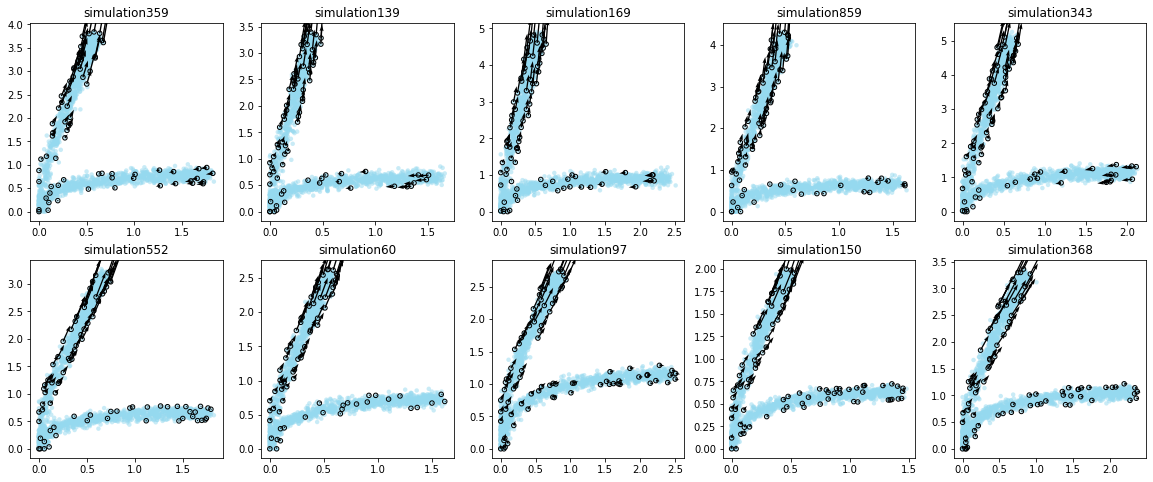

In [318]:
cellDancer_df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/celldancer/ratio1/celldancer_estimation.csv')

gene_list=['simulation359','simulation139','simulation169','simulation859','simulation343',
          'simulation552','simulation60','simulation97','simulation150','simulation368']

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 20,
        velocity=True,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()

## analysis

running celldancer analysis
0.4
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


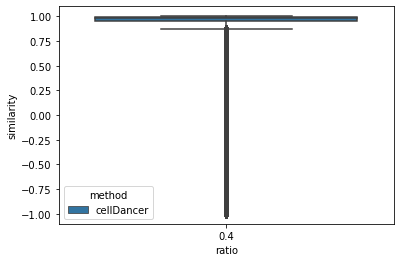

In [350]:
# move celldancer result
for ratio in [0.4]:
    analysis_celldancer(ratio)

# similarity plot celldancer

ratio: 0.2
less than 0.7:  4097
total:  60000
ratio:  0.06828333333333333


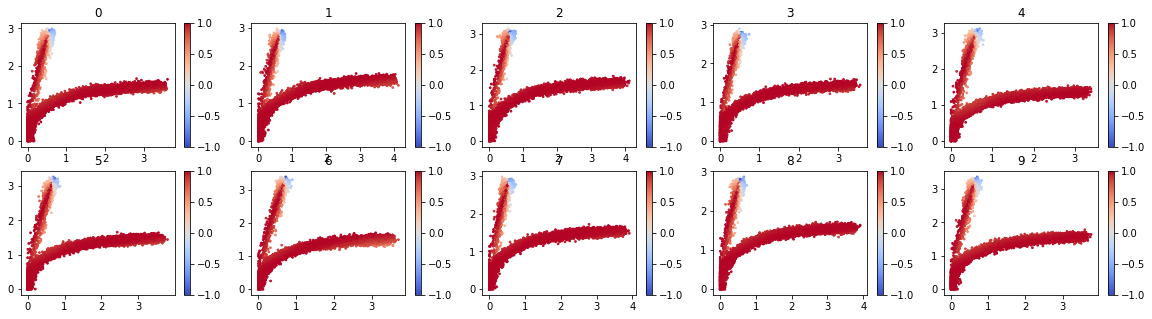

ratio: 0.4
less than 0.7:  4056
total:  35000
ratio:  0.11588571428571429


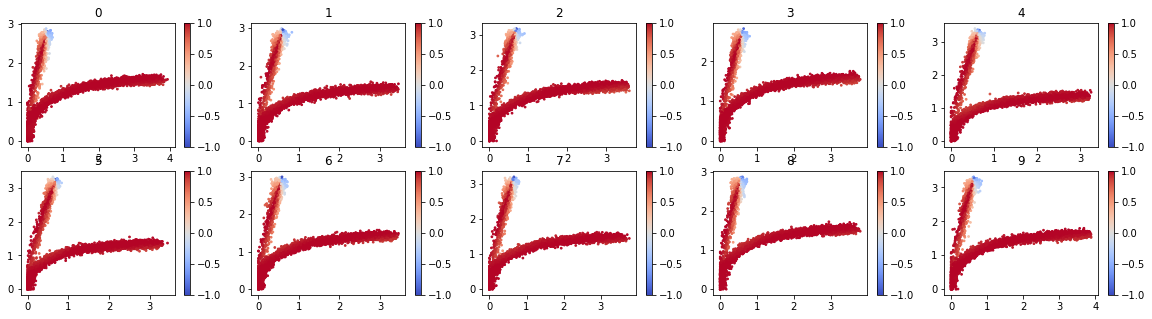

ratio: 0.6
less than 0.7:  4070
total:  26660
ratio:  0.15266316579144787


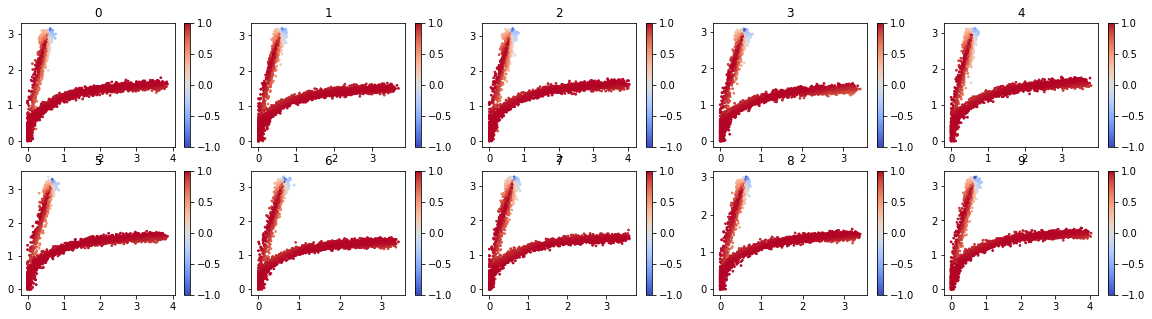

ratio: 0.8
less than 0.7:  4259
total:  22500
ratio:  0.1892888888888889


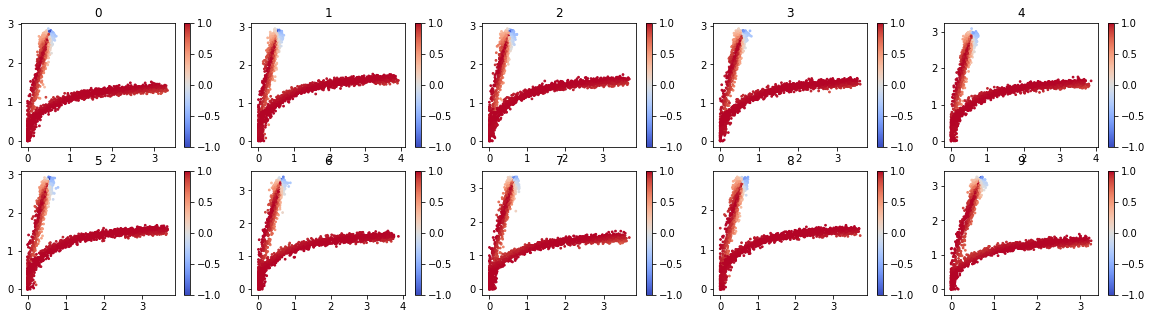

ratio: 1
less than 0.7:  4113
total:  20000
ratio:  0.20565


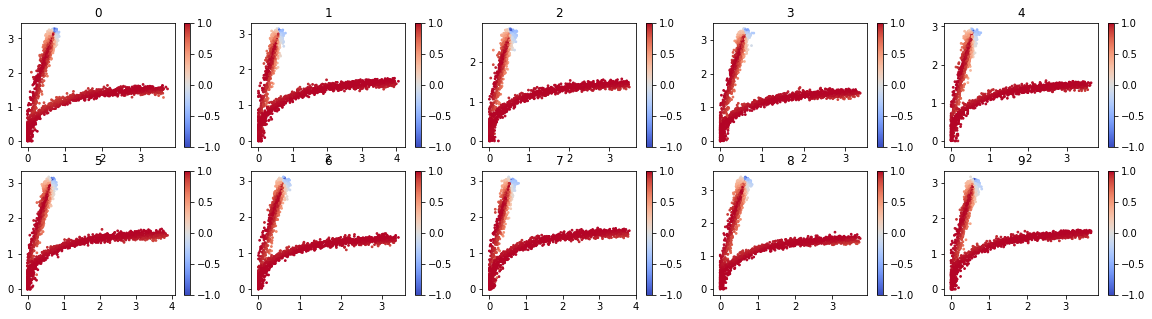

In [213]:
ratio_list=[0.2,0.4,0.6,0.8,1]
for ratio in ratio_list:
    print('ratio: '+str(ratio))
    celldancer_result=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/celldancer/ratio'+str(ratio)+'/celldancer_estimation.csv')
    analysis_cd=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/celldancer_similarity_eachCell'+str(ratio)+'.csv')
    analysis_cd=analysis_cd.rename(columns={"Unnamed: 0": "cellID", "cell": "gene"})
    analysis_cd
    filtered=analysis_cd[analysis_cd.similarity<0.7].shape[0]
    total=analysis_cd.shape[0]
    print('less than 0.7: ',filtered)
    print('total: ',total)
    print('ratio: ',filtered/total)
    ncols=5
    height=math.ceil(len(gene_list)/5)*5
    fig = plt.figure(figsize=(20,height))

    num_list=[0,1,2,3,4,5,6,7,8,9]

    for i in range(len(num_list)):
        num=num_list[i]
        gene_name='simulation'+str(num)
        onegene_celldancer_result=celldancer_result[celldancer_result.gene_name==gene_name]
        onegene_analysis_cd=analysis_cd[analysis_cd.gene==num]
        ax = fig.add_subplot(math.ceil(len(num_list)/ncols), ncols, i+1)
        
        im = ax.scatter(onegene_celldancer_result.splice,onegene_celldancer_result.unsplice,c=onegene_analysis_cd.similarity,s=3,vmin=-1,vmax=1,cmap='coolwarm')
        fig.colorbar(im, ax=ax)
        
        ax.set_title(num_list[i])
        # ax.axis('off')

        
    plt.show()

# similarity plot scvelo

ratio: 0.2
less than 0.7:  539379
total:  600000
ratio:  0.898965


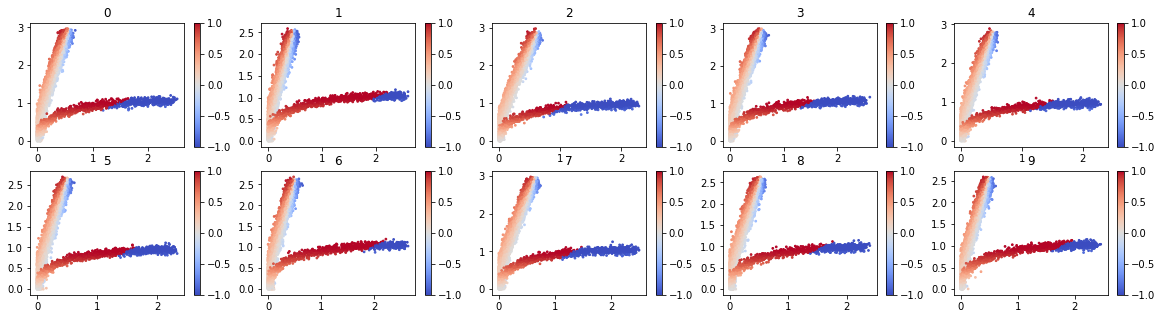

ratio: 0.4
less than 0.7:  282796
total:  350000
ratio:  0.8079885714285714


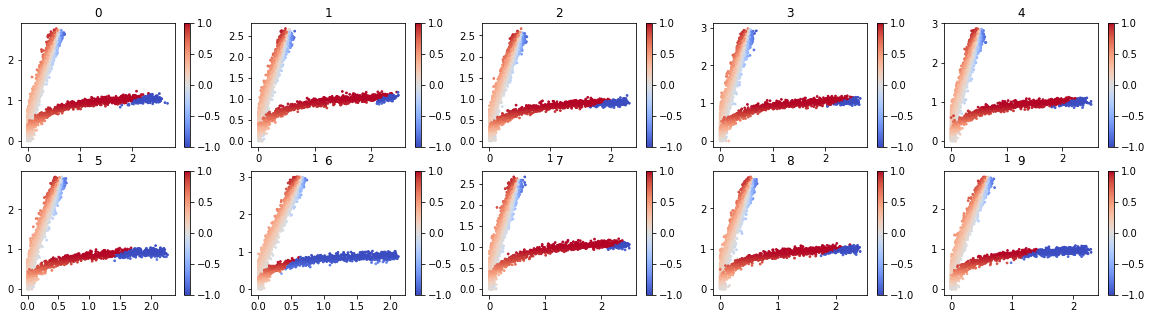

ratio: 0.6
less than 0.7:  193384
total:  266600
ratio:  0.7253713428357089


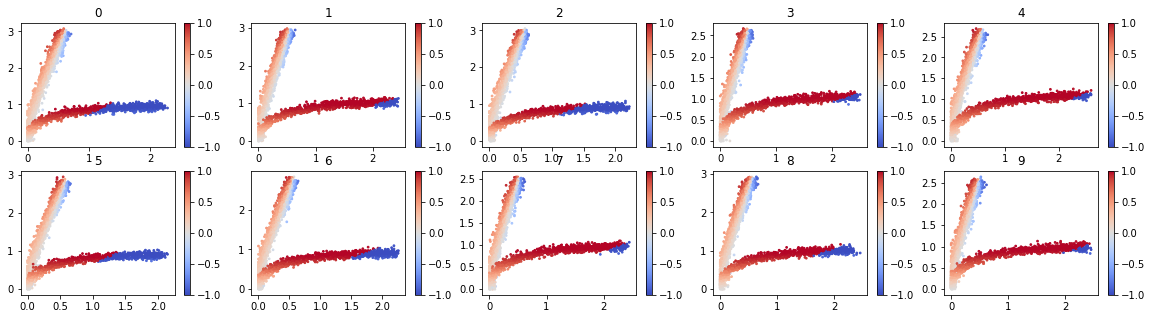

ratio: 0.8
less than 0.7:  149054
total:  225000
ratio:  0.6624622222222222


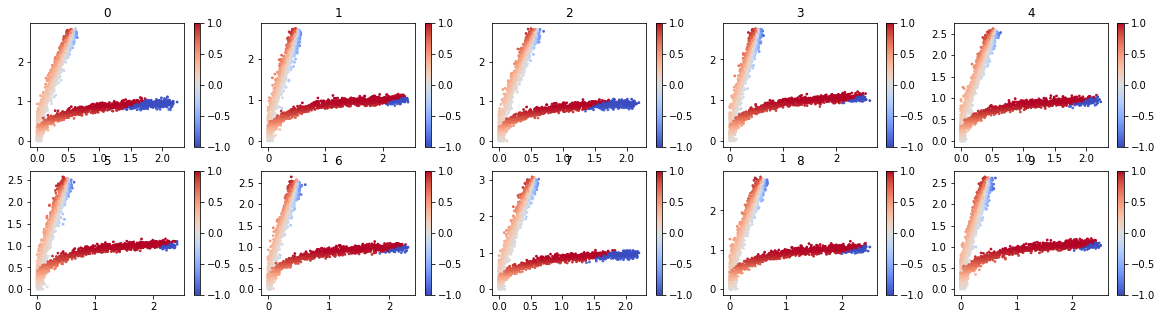

ratio: 1
less than 0.7:  122453
total:  200000
ratio:  0.612265


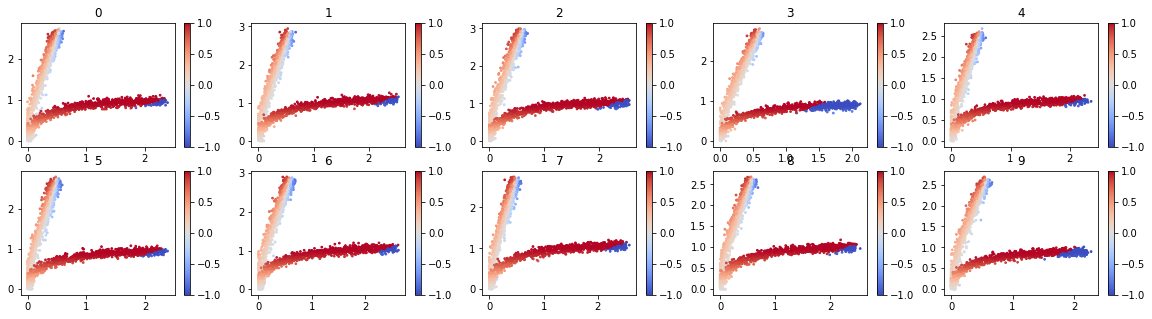

In [239]:
ratio_list=[0.2,0.4,0.6,0.8,1]
for ratio in ratio_list:
    print('ratio: '+str(ratio))
    celldancer_result=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/scv/scvelo_result_multi_path__splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df_'+str(ratio)+'.csv')
    analysis_cd=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/scvelo_similarity_eachCell'+str(ratio)+'.csv')
    analysis_cd=analysis_cd.rename(columns={"Unnamed: 0": "cellID", "cell": "gene"})
    analysis_cd
    analysis_cd=analysis_cd[analysis_cd.method=='static']
    filtered=analysis_cd[analysis_cd.similarity<0.7].shape[0]
    total=analysis_cd.shape[0]
    print('less than 0.7: ',filtered)
    print('total: ',total)
    print('ratio: ',filtered/total)
    ncols=5
    height=math.ceil(len(gene_list)/5)*5
    fig = plt.figure(figsize=(20,height))

    num_list=[0,1,2,3,4,5,6,7,8,9]

    for i in range(len(num_list)):
        num=num_list[i]
        gene_name='simulation'+str(num)
        onegene_celldancer_result=celldancer_result[celldancer_result.gene_name==gene_name]
        onegene_analysis_cd=analysis_cd[analysis_cd.gene==num]
        ax = fig.add_subplot(math.ceil(len(num_list)/ncols), ncols, i+1)
        
        im = ax.scatter(onegene_celldancer_result.static_splice,onegene_celldancer_result.static_unsplice,c=onegene_analysis_cd.similarity,s=3,vmin=-1,vmax=1,cmap='coolwarm')
        fig.colorbar(im, ax=ax)
        
        ax.set_title(num_list[i])
        # ax.axis('off')

        
    plt.show()